In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling



In [2]:
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv('HR_comma_sep.csv')

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [12]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#Converting categorical data into numerical data

In [14]:
df['salary'] = df['salary'].map({"low":0,"medium":1,"high":2})

In [15]:
df['salary'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [17]:

df['sales']=df['sales'].map({"sales":0,"accounting":1,"hr":2,"technical":3,"support":4,"management":5,"IT":6,
                          "product_mng":7,"marketing":8,"RandD":9})

In [18]:
df['sales'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

#Handling Outliers

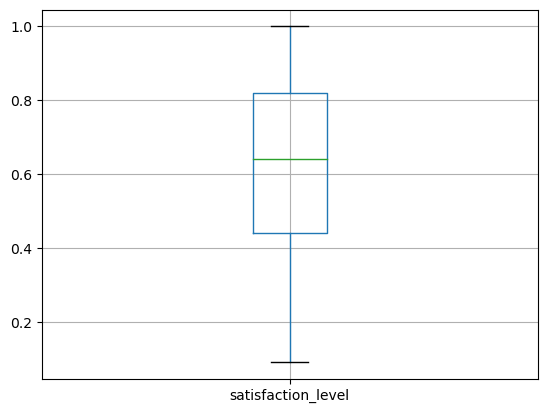

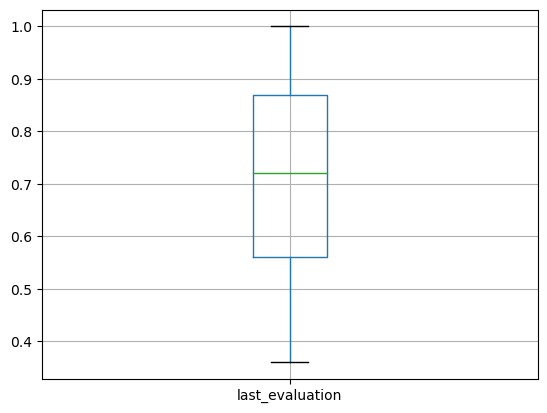

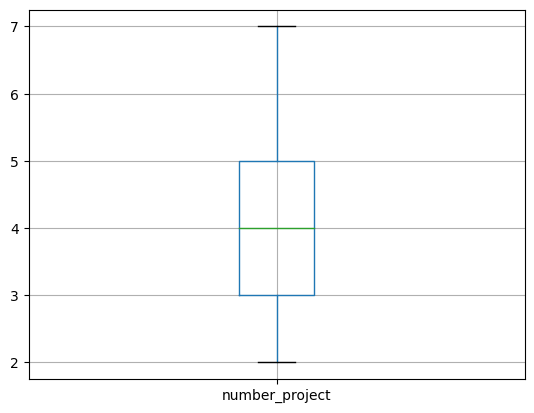

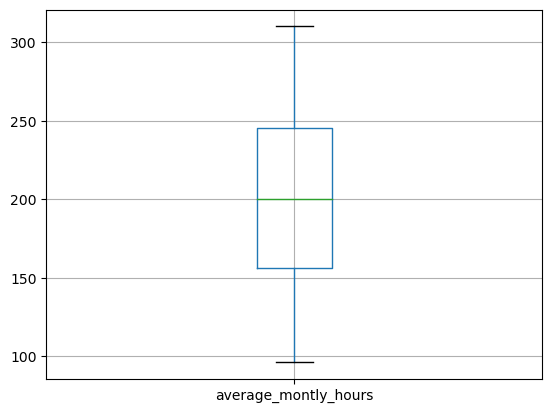

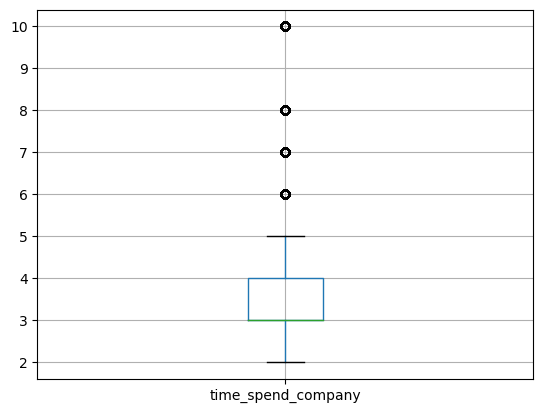

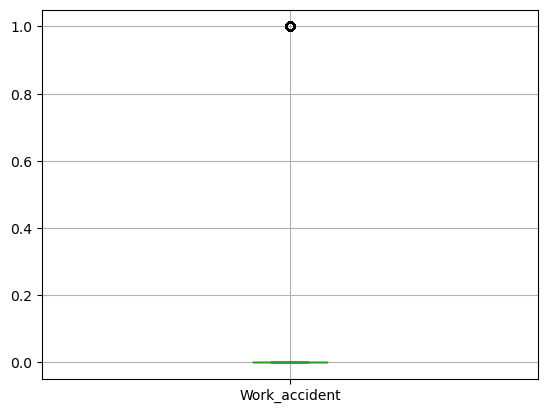

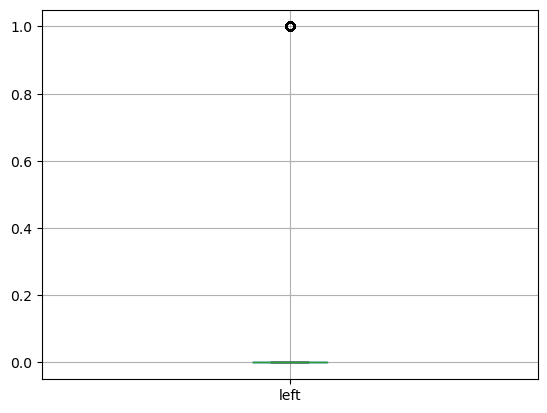

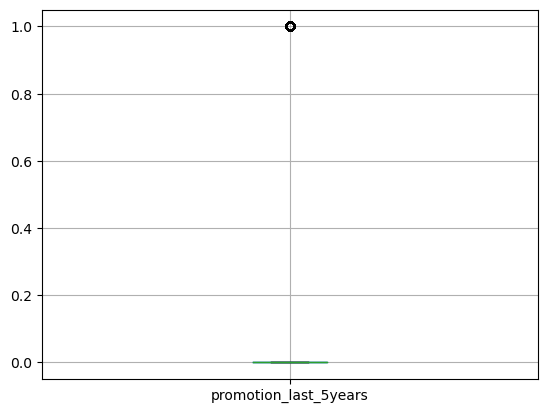

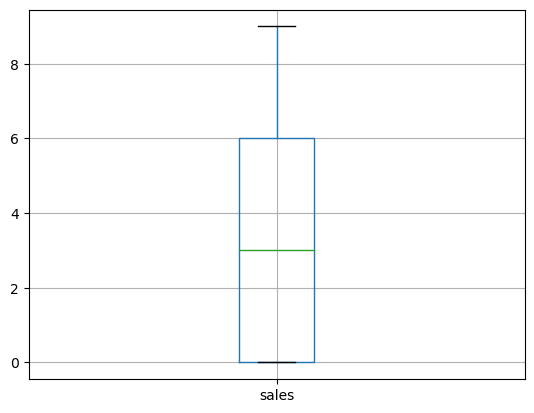

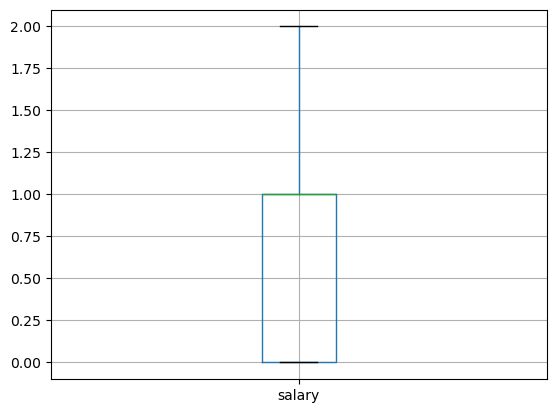

In [19]:
for i in df.columns:
  df[[i]].boxplot()
  plt.show()

In [20]:
def iqr(df):
  iqr=df.quantile(0.75)-df.quantile(0.25)
  upper_range=df.quantile(0.75) + (1.5*iqr)
  lower_range=df.quantile(0.25) - (1.5*iqr)
  return upper_range,lower_range

In [21]:
upper,lower=iqr(df)

In [22]:
upper,lower

(satisfaction_level         1.390
 last_evaluation            1.335
 number_project             8.000
 average_montly_hours     378.500
 time_spend_company         5.500
 Work_accident              0.000
 left                       0.000
 promotion_last_5years      0.000
 sales                     15.000
 salary                     2.500
 dtype: float64,
 satisfaction_level       -0.130
 last_evaluation           0.095
 number_project            0.000
 average_montly_hours     22.500
 time_spend_company        1.500
 Work_accident             0.000
 left                      0.000
 promotion_last_5years     0.000
 sales                    -9.000
 salary                   -1.500
 dtype: float64)

In [23]:
r=['satisfaction_level','last_evaluation','number_project','number_project',
    'time_spend_company','Work_accident','left','promotion_last_5years','sales','salary']



fig,ax=plt.subplots(4,2,figsize=(25,15))
for i,subplot in zip(r,ax.flatten()):
    sns.boxplot(df[i],ax=subplot,color='g')

In [24]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [73]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [81]:
df['left'].unique()

array([1, 0], dtype=int64)

In [141]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [74]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [25]:
import matplotlib.pyplot as plt

In [26]:
sns.countplot(df['left'])

<AxesSubplot:xlabel='left', ylabel='count'>

#exploratory data analysis

In [27]:
sns.pairplot(df)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=df.drop(['left'],axis=1)
y=df['left']

In [82]:
x.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0


In [86]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#scaling the values

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [32]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.2,shuffle=True)

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

#Model Building with Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [91]:
lgr=LogisticRegression()

In [92]:
lgr


LogisticRegression()

In [93]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
from sklearn.metrics import classification_report

In [94]:
y_train_pred = lgr.predict(x_train)
y_test_pred = lgr.predict(x_test)

In [95]:
confusion_matrix(y_train,y_train_pred)

array([[8417,  717],
       [1958,  907]], dtype=int64)

In [96]:
accuracy_score(y_train,y_train_pred)*100

77.7064755396283

In [97]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9134
           1       0.56      0.32      0.40      2865

    accuracy                           0.78     11999
   macro avg       0.68      0.62      0.63     11999
weighted avg       0.75      0.78      0.75     11999



In [98]:
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)


In [99]:
y_train.value_counts()

0    9134
1    9134
Name: left, dtype: int64

#hyperparametric tuning for logistic regression

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
logi_final=LogisticRegression()

In [105]:
parameters={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'tol' : [1e-1 , 1e-2 , 1e-3 , 1e-4],
    'class_weight' : ['balanced',None],
    'max_iter' : [50,100,130,150,200],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'verbose' : [0,1],
    'n_jobs' : [1,-1]}

In [106]:
gs=GridSearchCV(estimator=logi_final,
                param_grid=parameters,
                scoring='accuracy',
                cv=10,
                n_jobs=-1)

grid_search=gs.fit(x_train,y_train)
print('Best_Accuracy=',grid_search.best_score_)
print('Best_parameters=',grid_search.best_params_)

#testing logistic regression

In [107]:
lgr.predict([[0.80,0.86,5,262,6,0,0,0,1]])

array([0], dtype=int64)

In [108]:
lgr.predict([[0.72,0.87,5,223,5,0,0,0,0]])

array([0], dtype=int64)

In [109]:
lgr.predict([[0.38,0.53,2,157,3,0,0,0,0]])

array([1], dtype=int64)

In [110]:
lgr.predict([[0.11,0.88,7,272,4,0,0,0,1]])

array([1], dtype=int64)

In [111]:
lgr.predict([[0.40,0.57,2,151,3,0,0,4,0]])

array([0], dtype=int64)

In [112]:
lgr.predict([[0.23,0.28,3,121,2,0,0,2,0]])

array([0], dtype=int64)

#Model Building With Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
ran = RandomForestClassifier(criterion = 'entropy', random_state = 0)

In [116]:
ran

RandomForestClassifier(criterion='entropy', random_state=0)

In [117]:
ran.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [118]:
y_train_pred = ran.predict(x_train)

In [119]:
y_test_pred = ran.predict(x_test)

In [120]:
confusion_matrix(y_train , y_train_pred)

array([[9134,    0],
       [   0, 9134]], dtype=int64)

In [121]:
accuracy_score(y_train,y_train_pred)*100

100.0

In [122]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      9134

    accuracy                           1.00     18268
   macro avg       1.00      1.00      1.00     18268
weighted avg       1.00      1.00      1.00     18268



In [123]:
confusion_matrix(y_test, y_test_pred)

array([[2278,   16],
       [  26,  680]], dtype=int64)

In [124]:
accuracy_score(y_test,y_test_pred)*100

98.6

In [125]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



#Saving The Model

In [140]:
df.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0


In [130]:
import os

In [136]:
os.chdir("D:\MiniProjects24\Work_Force_Retention_System_Jyo")

In [137]:
import pickle
pickle.dump(ran,open('lgr.pkl','wb'))

In [138]:
os.getcwd()

'D:\\MiniProjects24\\Work_Force_Retention_System_Jyo'